# Random Variables

### Discrete Random Variables
- Probability Mass Function (PMF)
- Likelihood Functions
- Maximum Likelihood Estimate
- Bernoulli distribution
- Geometric Distribution
- Binomial Distribution
- Poisson distribution


### Continuous Random Variables
- Cumulative Distribution Function (CDF)
- Probability Distribution Function (PDF)
- Kernel Density Estimate (KDE)
- Likelihood Functions
- Uniform Distribution
- Exponential Distribution
- Gaussian distribution


# Discrete Random Variables

### Probability Mass Function (PMF)

- The Probability Mass Function (PMF) is a function that describes the probability distribution of a discrete random variable.
- In simpler words, it gives the probability of each possible outcome of the random variable

#### A PMF equation looks like this:

##### P(X = x)

### For example, if you roll a fair six-sided die, the PMF would assign a probability to each face (1, 2, 3, 4, 5, or 6) indicating how likely it is to occur.

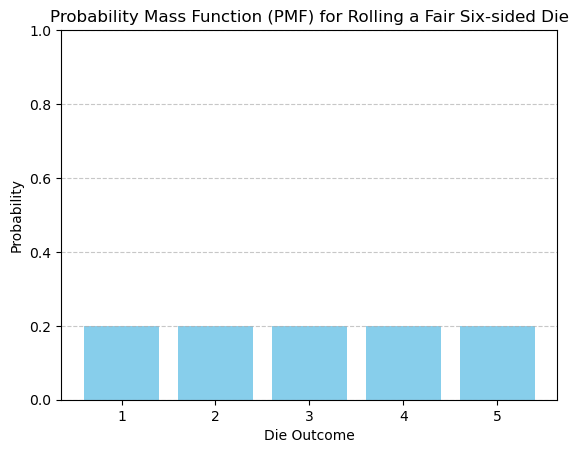

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the sample space (outcomes of rolling a fair six-sided die)
sample_space = np.arange(1, 6)

# Define the Probability Mass Function (PMF)
def pmf(outcome):
    # For a fair die, each outcome has an equal probability
    probability = 1 / len(sample_space)
    return probability

# Calculate PMF for each possible outcome
pmf_values = [pmf(outcome) for outcome in sample_space]

# Visualize the PMF using a bar chart
plt.bar(sample_space, pmf_values, color='skyblue')
plt.xlabel('Die Outcome')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) for Rolling a Fair Six-sided Die')
plt.xticks(sample_space)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Likelihood Functions

- Likelihood function is a fundamental concept in statistical inference. 
- It indicates how likely a particular population is to produce an observed sample.

- Let P(X; T) be the distribution of a random vector X, where T is the vector of parameters of the distribution. 

### Mathematical Formula: 
    
The likelihood function is often written as the probability density (or mass) function, f(x∣θ), where x is the observed data and θ is the parameter.

- So, L(θ∣x)=f(x∣θ).

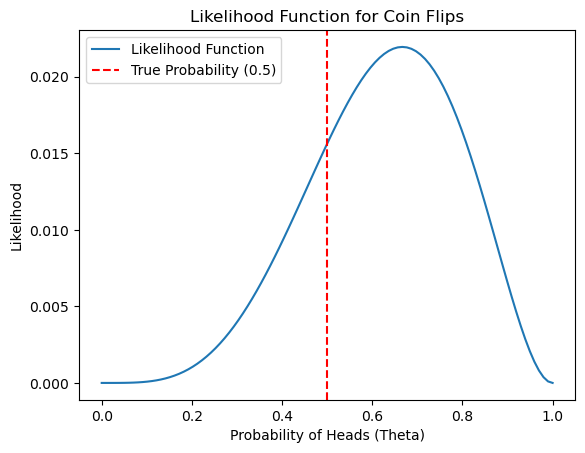

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the likelihood function for a coin flip
def likelihood(theta, flips):
    p_heads = theta # Assuming a fair coin
    p_tails = 1 - theta
    likelihood_values = np.where(flips == 'H', p_heads, p_tails)
    return np.prod(likelihood_values)

# Simulate a series of coin flips (H for heads, T for tails)
observed_data = np.array(['H', 'T', 'H', 'H', 'T', 'H'])

# Calculate likelihood for different values of theta (coin's probability of landing heads)
theta_values = np.linspace(0, 1, 100)
likelihoods = [likelihood(theta, observed_data) for theta in theta_values]

# Visualize the likelihood function
plt.plot(theta_values, likelihoods, label='Likelihood Function')
plt.xlabel('Probability of Heads (Theta)')
plt.ylabel('Likelihood')
plt.title('Likelihood Function for Coin Flips')
plt.axvline(x=0.5, color='r', linestyle='--', label='True Probability (0.5)')
plt.legend()
plt.show()


# Maximum Likelihood Estimate

- Maximum Likelihood Estimate is like finding the best guess for a parameter that makes our observed data most probable. 
- It's like adjusting the settings to fit the observed results as closely as possible.

### In Real Life: 
- If you're trying to guess the fairness of a coin, MLE helps you find the probability of getting heads that makes your observed coin flips the most likely.

### Formal Explanation: 
- The Maximum Likelihood Estimate for a parameter, often denoted as MLEθMLE, is the value that maximizes the likelihood function. 
- It's the parameter value that makes our observed data most probable.

### Mathematical Formula: 
- If L(θ∣x) is the likelihood function, MLE is found by maximizing this function, i.e., 

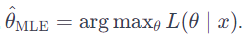

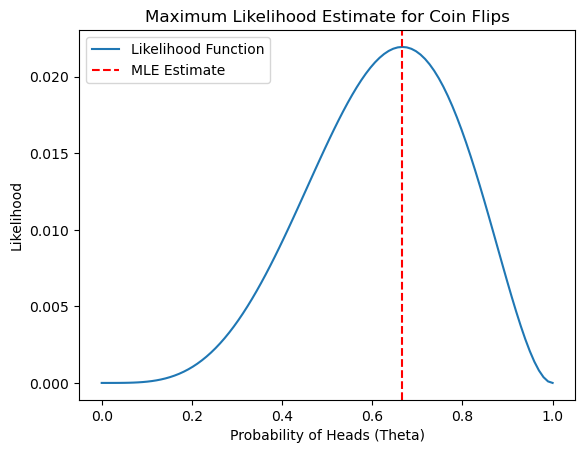

Maximum Likelihood Estimate (MLE) for probability of heads: 0.6666596672351189


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the likelihood function for a coin flip
def likelihood(theta, flips):
    p_heads = theta
    p_tails = 1 - theta
    likelihood_values = np.where(flips == 'H', p_heads, p_tails)
    return np.prod(likelihood_values)

# Simulate a series of coin flips (H for heads, T for tails)
observed_data = np.array(['H', 'T', 'H', 'H', 'T', 'H'])

# Define the negative log-likelihood (since scipy's minimize minimizes)
neg_log_likelihood = lambda theta: -likelihood(theta, observed_data)

# Find the Maximum Likelihood Estimate using scipy's minimize
mle_result = minimize(neg_log_likelihood, x0=0.5, bounds=[(0, 1)])

# Visualize the likelihood function and MLE
theta_values = np.linspace(0, 1, 100)
likelihoods = [likelihood(theta, observed_data) for theta in theta_values]

plt.plot(theta_values, likelihoods, label='Likelihood Function')
plt.axvline(x=mle_result.x[0], color='r', linestyle='--', label='MLE Estimate')
plt.xlabel('Probability of Heads (Theta)')
plt.ylabel('Likelihood')
plt.title('Maximum Likelihood Estimate for Coin Flips')
plt.legend()
plt.show()

# Print the MLE result
print(f"Maximum Likelihood Estimate (MLE) for probability of heads: {mle_result.x[0]}")


# Explaination

- The code defines the likelihood function and uses scipy's minimize function to find the value of θ that maximizes the likelihood function (i.e., the MLE).

- The likelihood function and the MLE estimate are visualized using a plot.

# Bernoulli Distribution

- Bernoulli Distribution is a type of discrete probability distribution where every experiment conducted asks a question that can be answered only in yes or no. 
- In other words, the random variable can be 1 with a probability p or it can be 0 with a probability (1 - p). 
- Such an experiment is called a Bernoulli trial. A pass or fail exam can be modeled by a Bernoulli Distribution.

## In Real Life: 
- If you're flipping a biased coin that has a probability p of landing heads, the Bernoulli distribution helps predict the chance of getting heads (success) or tails (failure).

## Formal Explanation: 
The Bernoulli distribution is characterized by a parameter p representing the probability of success (getting a '1') in a single trial. The outcomes are binary—success or failure.

## Mathematical Formula: 
If X follows a Bernoulli distribution, we write it as ∼ Bernoulli X∼Bernoulli(p).

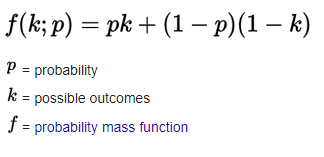

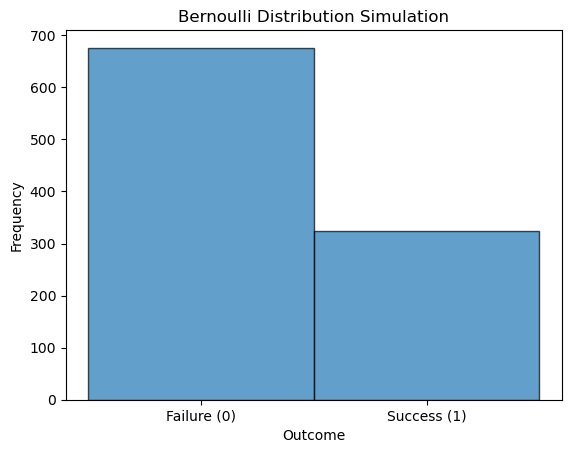

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Define the probability of success (landing heads)
p = 0.3

# Create a Bernoulli distribution
bernoulli_dist = bernoulli(p)

# Generate random samples from the distribution
random_samples = bernoulli_dist.rvs(size=1000)

# Plot the histogram of the generated samples
plt.hist(random_samples, bins=[-0.5, 0.5, 1.5], edgecolor='black', alpha=0.7)
plt.xticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Bernoulli Distribution Simulation')
plt.show()


## Explanaion


- The code defines the probability of success (p), which is the probability of getting heads in a single trial.

- It uses scipy.stats.bernoulli to create a Bernoulli distribution with the specified probability.

- Random samples are generated from the distribution using .rvs().

- The code then plots a histogram to show the frequency of success (1) and failure (0) in the generated samples.



# Geometric distribution

- The Geometric distribution is like flipping a coin until you get heads. It models the number of trials needed to achieve the first success in a sequence of independent trials.

## In Real Life: 
- If you're flipping a coin until it lands heads, the Geometric distribution helps predict the number of flips needed to get that first heads.

## Formal Explanation: 
- The Geometric distribution is characterized by a parameter p representing the probability of success in a single trial. 
- It models the number of trials (X) needed to achieve the first success in a sequence of independent trials.

## Mathematical Formula: 
- If X follows a Geometric distribution, we write it as Geometric X∼Geometric(p). The probability mass function is given by

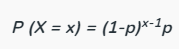


where x is the number of trials needed (starting from 1).

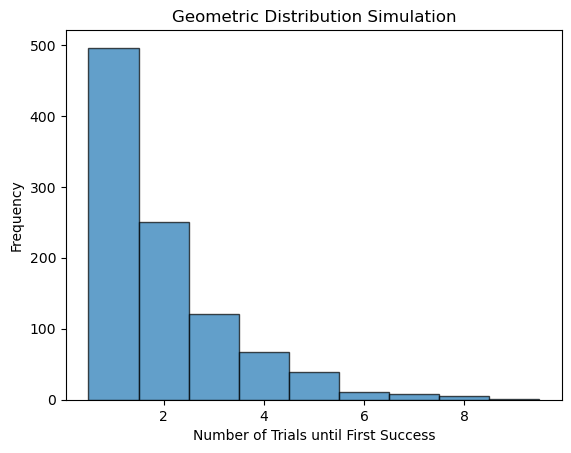

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# Define the probability of success (landing heads)
p = 0.5

# Create a Geometric distribution
geometric_dist = geom(p)

# Generate random samples from the distribution
random_samples = geometric_dist.rvs(size=1000)

# Plot the histogram of the generated samples
plt.hist(random_samples, bins=np.arange(1, max(random_samples) + 1) - 0.5, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Trials until First Success')
plt.ylabel('Frequency')
plt.title('Geometric Distribution Simulation')
plt.show()


### Explanation:

- The code defines the probability of success (p), which is the probability of getting heads in a single trial.

- It uses scipy.stats.geom to create a Geometric distribution with the specified probability.

- Random samples are generated from the distribution using .rvs().

- The code then plots a histogram to show the distribution of the number of trials needed to achieve the first success.

# Inferential statistics

- Inferential statistics involves drawing conclusions or making predictions about a population based on a sample of data.

## Sampling techniques

- Sampling techniques are methods used to select a subset of individuals or elements from a larger population in order to make inferences about the entire population. 
- The choice of sampling technique depends on the research question, the characteristics of the population, and practical considerations.

### Simple Random Sampling:

- Each individual or element in the population has an equal chance of being included in the sample.

In [18]:
import numpy as np

population = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
sample_size = 5

random_sample = np.random.choice(population, size=sample_size, replace=False)
print(random_sample)

[ 2  9 10  6  5]


### Stratified Random Sampling:

- The population is divided into subgroups (strata), and random samples are taken from each stratum.

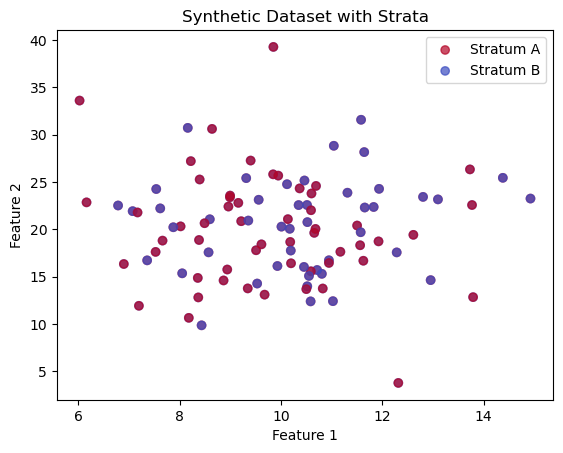

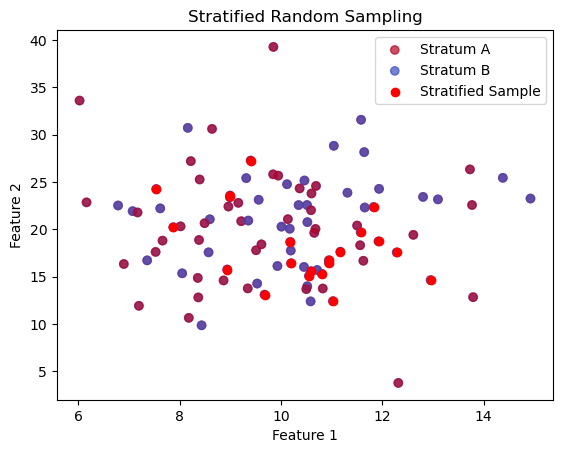

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a synthetic dataset with two strata
np.random.seed(42)

# Stratification variable
stratification_var = np.random.choice(['A', 'B'], size=100, p=[0.4, 0.6])

# Variables of interest
feature_1 = np.random.normal(loc=10, scale=2, size=100)
feature_2 = np.random.normal(loc=20, scale=5, size=100)

# Combine into a structured array
data = np.array(list(zip(stratification_var, feature_1, feature_2)),
                dtype=[('stratum', '<U1'), ('feature_1', '<f8'), ('feature_2', '<f8')])

# Visualizing the synthetic dataset with strata
plt.scatter(data['feature_1'], data['feature_2'], c=data['stratum'] == 'A', cmap='coolwarm', label='Stratum A', alpha=0.7)
plt.scatter(data['feature_1'], data['feature_2'], c=data['stratum'] == 'B', cmap='coolwarm', label='Stratum B', alpha=0.7)
plt.title('Synthetic Dataset with Strata')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Stratified Random Sampling
num_samples_per_stratum = 10

# Sample from each stratum
stratum_a_sample = np.random.choice(data[data['stratum'] == 'A'], size=num_samples_per_stratum, replace=False)
stratum_b_sample = np.random.choice(data[data['stratum'] == 'B'], size=num_samples_per_stratum, replace=False)

# Combine the samples
stratified_sample = np.concatenate([stratum_a_sample, stratum_b_sample])

# Visualizing the stratified sample
plt.scatter(data['feature_1'], data['feature_2'], c=data['stratum'] == 'A', cmap='coolwarm', label='Stratum A', alpha=0.7)
plt.scatter(data['feature_1'], data['feature_2'], c=data['stratum'] == 'B', cmap='coolwarm', label='Stratum B', alpha=0.7)
plt.scatter(stratified_sample['feature_1'], stratified_sample['feature_2'], c='red', label='Stratified Sample')
plt.title('Stratified Random Sampling')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### Systematic Sampling:

- Every nth individual or element is selected from the population after a random start.

In [25]:
population = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
k = 2  # Every 2nd element

systematic_sample = population[::k]
print(systematic_sample)

[1 3 5 7 9]


### Estimation

- Estimation in statistics involves making predictions or estimates about population parameters based on sample data. 
- One common method is point estimation, where a single value is used to estimate a population parameter. 

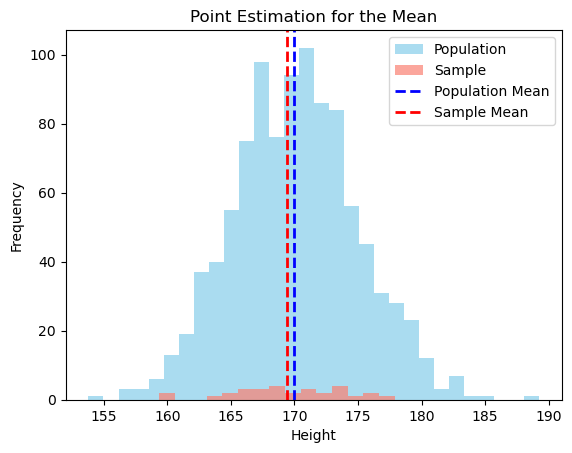

Sample Mean: 169.44996068368962


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a synthetic dataset of heights
population_mean = 170
population_std = 5
sample_size = 30

population = np.random.normal(loc=population_mean, scale=population_std, size=1000)

# Take a random sample from the population
sample = np.random.choice(population, size=sample_size)

# Calculate sample statistics
sample_mean = np.mean(sample)

# Visualize the population distribution and the sample
plt.hist(population, bins=30, alpha=0.7, label='Population', color='skyblue')
plt.hist(sample, bins=15, alpha=0.7, label='Sample', color='salmon')
plt.axvline(population_mean, color='blue', linestyle='dashed', linewidth=2, label='Population Mean')
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.title('Point Estimation for the Mean')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display the results
print(f"Sample Mean: {sample_mean}")


### confidence interval

- A confidence interval is a range of values that is likely to contain the true value of a population parameter, and it provides a measure of the uncertainty associated with an estimate.
-  In this example, we'll focus on creating a confidence interval for the mean of a population based on a sample.

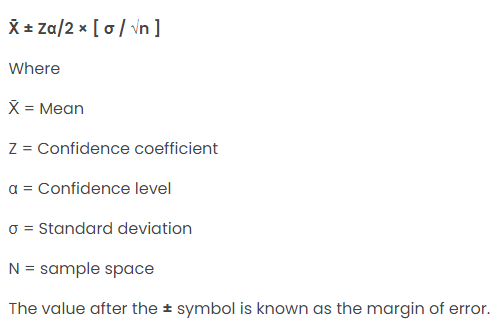

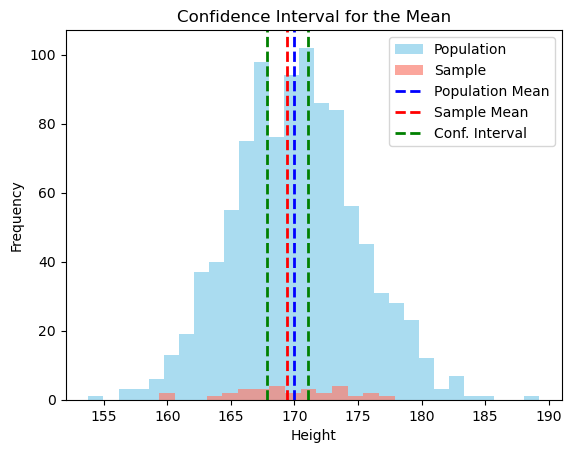

Sample Mean: 169.44996068368962
Confidence Interval: (167.8564297779873, 171.04349158939195)


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a synthetic dataset of heights
population_mean = 170
population_std = 5
sample_size = 30

population = np.random.normal(loc=population_mean, scale=population_std, size=1000)

# Take a random sample from the population
sample = np.random.choice(population, size=sample_size)

# Calculate sample statistics
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)  # Use ddof=1 for sample standard deviation

# Calculate the standard error of the mean (SEM)
sem = sample_std / np.sqrt(sample_size)

# Calculate the confidence interval for the mean
confidence_level = 0.95
margin_of_error = norm.ppf((1 + confidence_level) / 2) * sem
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Visualize the population distribution and the sample
plt.hist(population, bins=30, alpha=0.7, label='Population', color='skyblue')
plt.hist(sample, bins=15, alpha=0.7, label='Sample', color='salmon')
plt.axvline(population_mean, color='blue', linestyle='dashed', linewidth=2, label='Population Mean')
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='Conf. Interval')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2)
plt.title('Confidence Interval for the Mean')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display the results
print(f"Sample Mean: {sample_mean}")
print(f"Confidence Interval: {confidence_interval}")


# Binomial Distribution
- Binomial Distribution describes the probability of getting a certain number of successes (usually denoted as "k") in a fixed number of independent and identical trials, where each trial has only two possible outcomes: success or failure. 
- The key parameters are the number of trials (n), the probability of success in a single trial (p), and the number of successes (k).

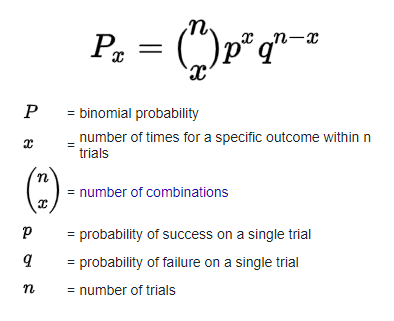

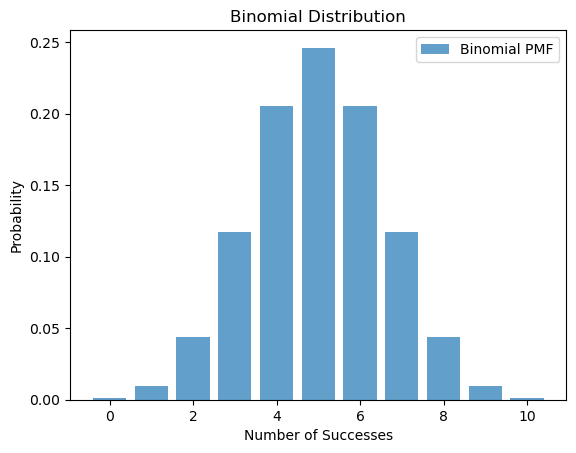

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 10  # number of trials
p = 0.5  # probability of success

# Create an array of possible values (0 to n) for the number of successes
x = np.arange(0, n+1)

# Calculate the probability mass function (PMF) for each value of x
pmf = binom.pmf(x, n, p)

# Plot the binomial distribution
plt.bar(x, pmf, align='center', alpha=0.7, label='Binomial PMF')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution')
plt.legend()
plt.show()


# Poisson Distribution

- Poisson Distribution is a Discrete Distribution.

- It estimates how many times an event can happen in a specified time. 
- e.g. If someone eats twice a day what is the probability he will eat thrice?

###### It has two parameters:

- lam - rate or known number of occurrences e.g. 2 for above problem.

- size - The shape of the returned array.

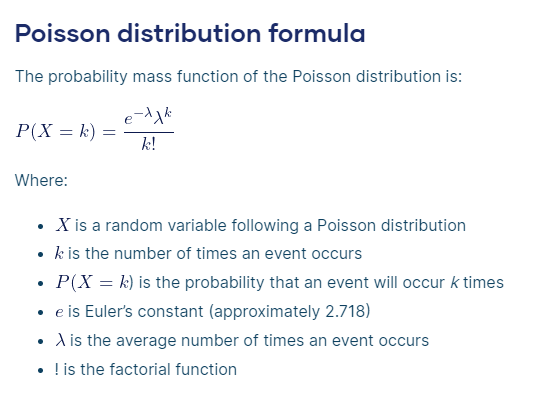

In [4]:
#from numpy import random
#import matplotlib.pyplot as plt
#import seaborn as sns
#
#sns.distplot(random.poisson(lam=2, size=1000), kde=False)

#plt.show()

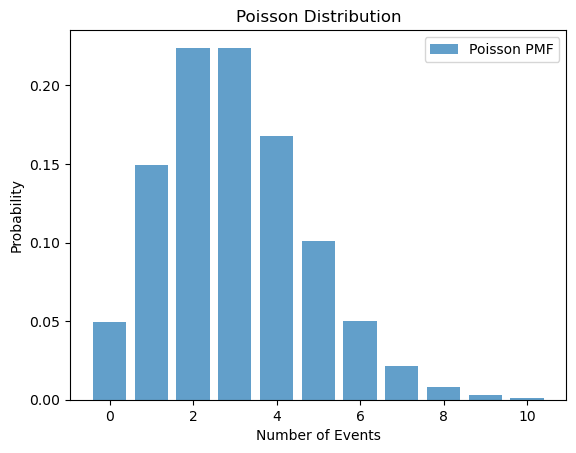

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
rate = 3  # average rate of events

# Create an array of possible values (0 to 10) for the number of events
k_values = np.arange(0, 11)

# Calculate the probability mass function (PMF) for each value of k
pmf = poisson.pmf(k_values, rate)

# Plot the Poisson distribution
plt.bar(k_values, pmf, align='center', alpha=0.7, label='Poisson PMF')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Poisson Distribution')
plt.legend()
plt.show()


# Continuous Random Variables

# Cumulative Distribution Function (CDF)
- The Cumulative Distribution Function (CDF) of a probability distribution gives the probability that a random variable takes on a value less than or equal to a specified value.

###### or
- A cumulative distribution function (CDF) describes the probabilities of a random variable having values less than or equal to x. 
- It is a cumulative function because it sums the total likelihood up to that point.
- Its output always ranges between 0 and 1.

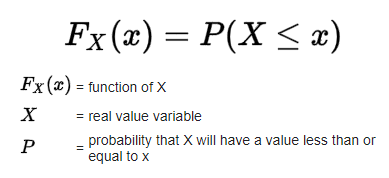

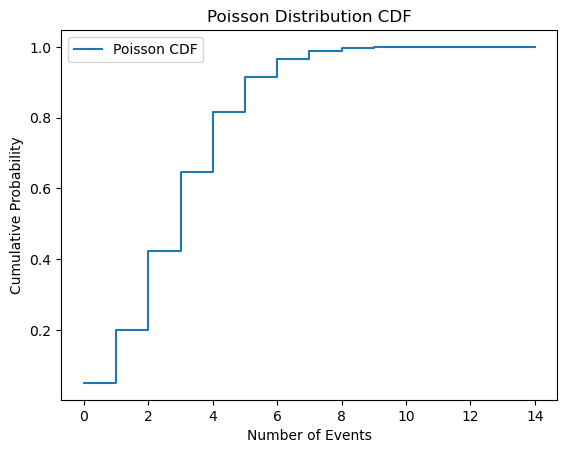

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameter
lambda_value = 3  # average rate of events

# Create an array of possible values for the number of events
k_values = np.arange(0, 15)

# Calculate the cumulative distribution function (CDF) for each value of k
cdf = poisson.cdf(k_values, lambda_value)

# Plot the CDF of the Poisson Distribution
plt.step(k_values, cdf, where='post', label='Poisson CDF')
plt.xlabel('Number of Events')
plt.ylabel('Cumulative Probability')
plt.title('Poisson Distribution CDF')
plt.legend()
plt.show()


# Probability Distribution Function (PDF)
- A Probability Distribution Function (PDF) describes the likelihood of a continuous random variable taking on a specific value within a given range. 